<>:11: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Allen\AppData\Local\Temp\ipykernel_18952\2494886998.py:11: SyntaxWarning: invalid escape sequence '\S'
  sales_df = pd.read_csv(f"{file_path}\Sales.csv")
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib

ValueError: x and y must have same first dimension, but have shapes (30,) and (1,)

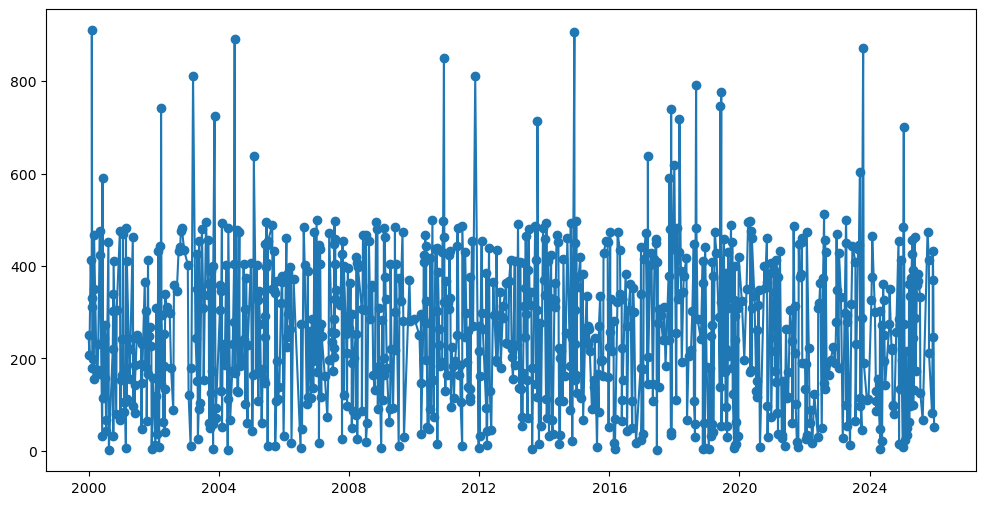

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Define the file path
file_path = r"C:\Users\Allen\Desktop\projects\project 6-sg nutrition data base analysis\data set"

# Load datasets
sales_df = pd.read_csv(f"{file_path}\Sales.csv")

# Rename "Order Date" to "Sale Date" for consistency
sales_df.rename(columns={"Order Date": "Sale Date"}, inplace=True)

# Convert dates to datetime
sales_df['Sale Date'] = pd.to_datetime(sales_df['Sale Date'])

# Aggregate total quantity sold per product over time
sales_forecast_df = sales_df.groupby(['Sale Date', 'Product'])['Quantity'].sum().reset_index()

# Set date index for forecasting
sales_forecast_df.set_index('Sale Date', inplace=True)

# Forecast demand for all products over the next month (30 days)
forecast_steps = 30
unique_products = sales_forecast_df['Product'].unique()
all_forecasts = []

for product in unique_products:
    try:
        product_sales = sales_forecast_df[sales_forecast_df['Product'] == product]['Quantity']
        model = ARIMA(product_sales, order=(5,1,0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=forecast_steps)
        forecast_df = pd.DataFrame({'Forecasted Quantity': forecast.values, 'Product': product})
        total_forecast = forecast_df['Forecasted Quantity'].sum()
        all_forecasts.append({'Product': product, 'Forecasted Sales Next Month': total_forecast})
    except Exception as e:
        print(f"Skipping {product} due to error: {e}")

# Convert forecast results into a DataFrame
final_forecast_df = pd.DataFrame(all_forecasts)

# Visualizing the forecast
plt.figure(figsize=(12, 6))
for product in unique_products[:5]:  # Plot first 5 products for visualization
    product_sales = sales_forecast_df[sales_forecast_df['Product'] == product]['Quantity']
    plt.plot(product_sales, label=f"{product} - Historical Sales", marker="o")
    
    forecast_product = [item for item in all_forecasts if item['Product'] == product]
    if forecast_product:
        plt.plot(range(len(product_sales), len(product_sales) + forecast_steps), 
                 forecast_product[0]['Forecasted Sales Next Month'], 
                 label=f"{product} - Forecast", linestyle="dashed", marker="o")

plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.title("Sales Forecast for Next Month")
plt.legend()
plt.show()

# Print out all products with their forecasted sales amount next month
print(final_forecast_df)
